<a href="https://colab.research.google.com/github/gerogeykp/Data-Science/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline


from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)

# Ingest the data to notebook

In [ ]:
pd.set_option('max_columns',100)
pd.set_option('max_rows',900)

pd.set_option('max_colwidth',200)

df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df[df.duplicated()== True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


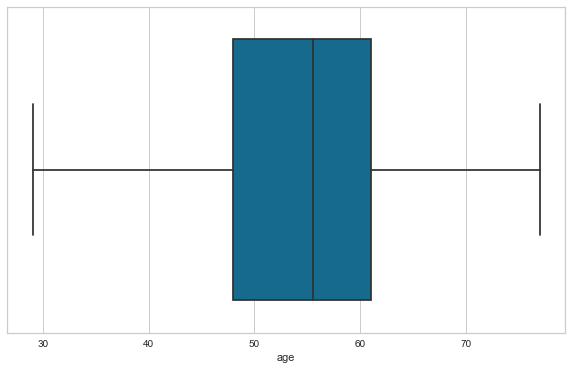

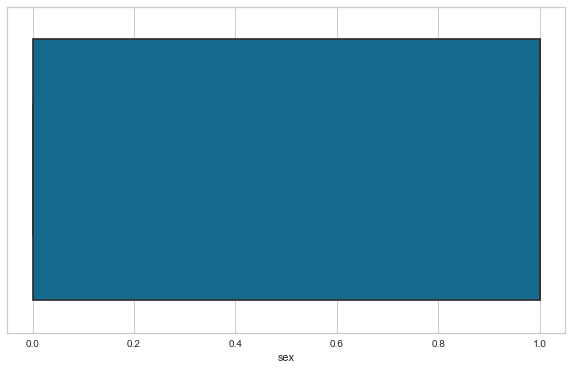

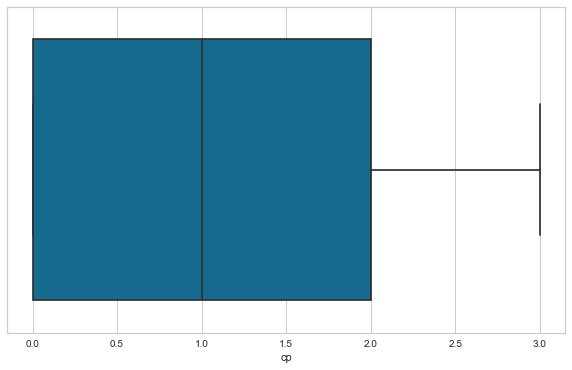

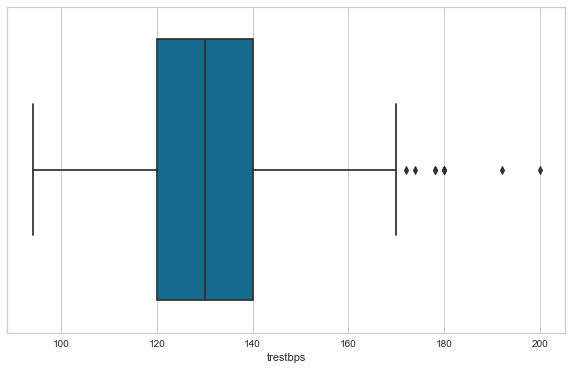

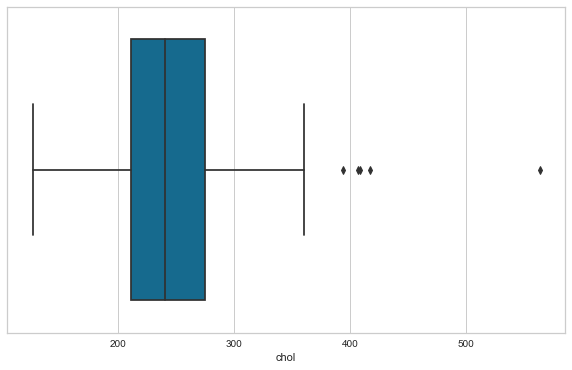

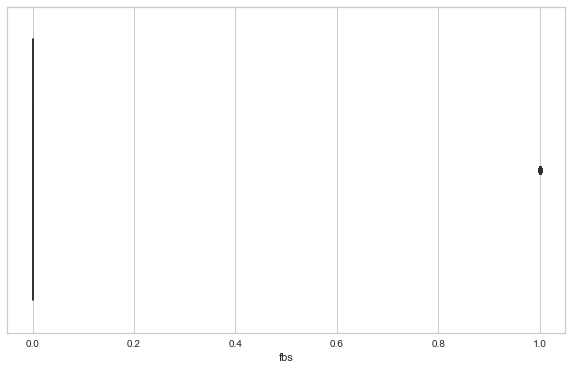

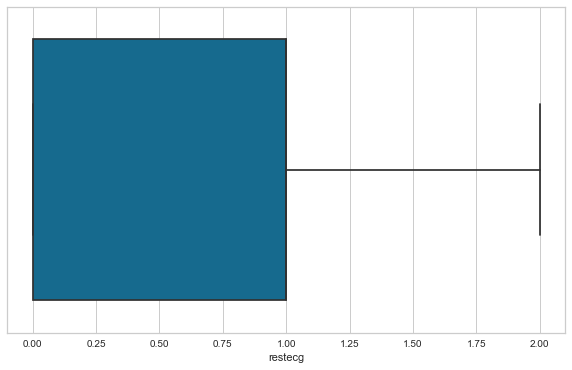

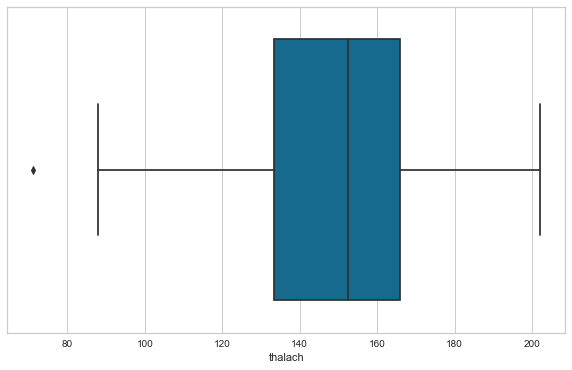

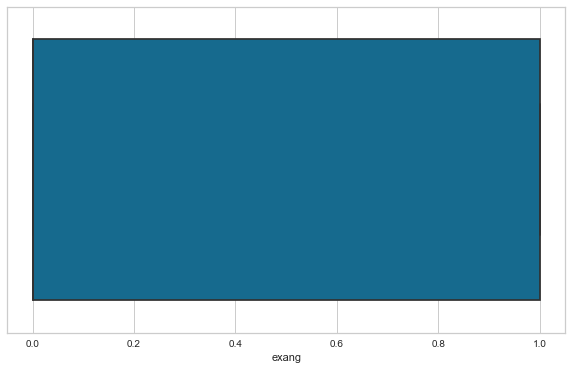

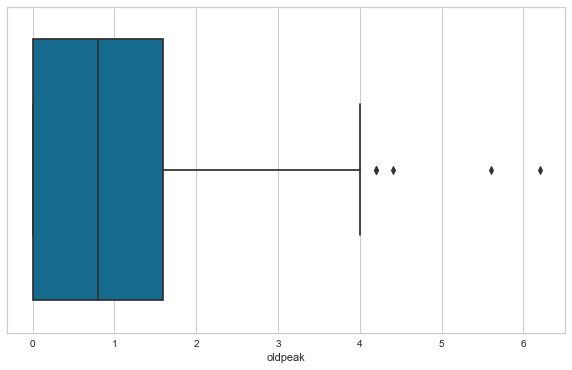

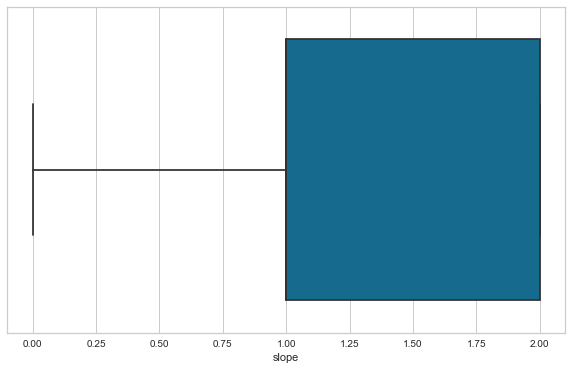

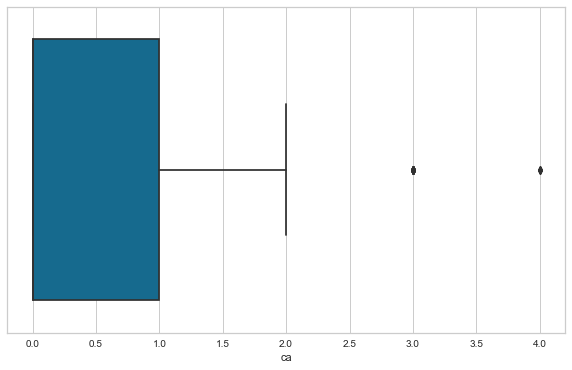

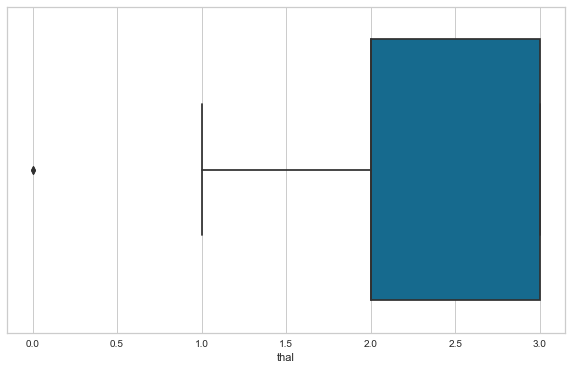

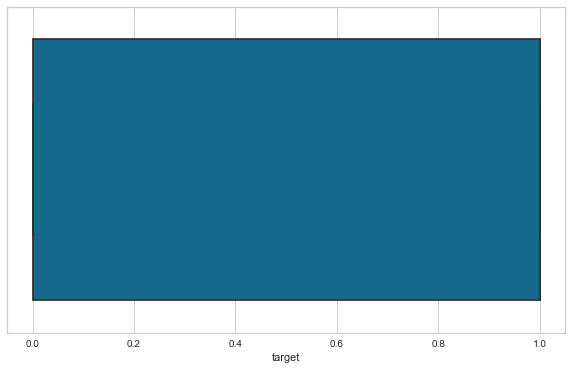

In [ ]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.boxplot(df[col],x=col)

In [ ]:
df.skew()

age        -0.203743
sex        -0.786120
cp          0.493022
trestbps    0.716541
chol        1.147332
fbs         1.981201
restecg     0.169467
thalach    -0.532671
exang       0.737281
oldpeak     1.266173
slope      -0.503247
ca          1.295738
thal       -0.481232
target     -0.173691
dtype: float64

<AxesSubplot:>

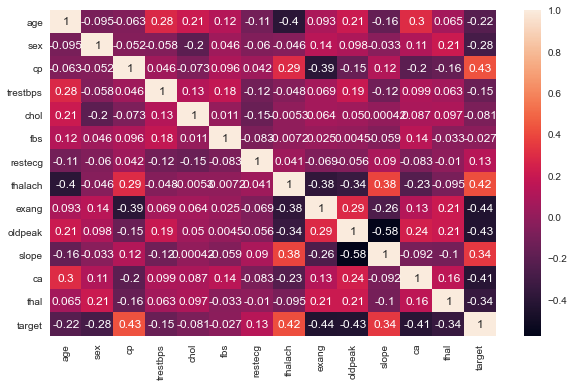

In [ ]:
sns.heatmap(df.corr(), annot=True)

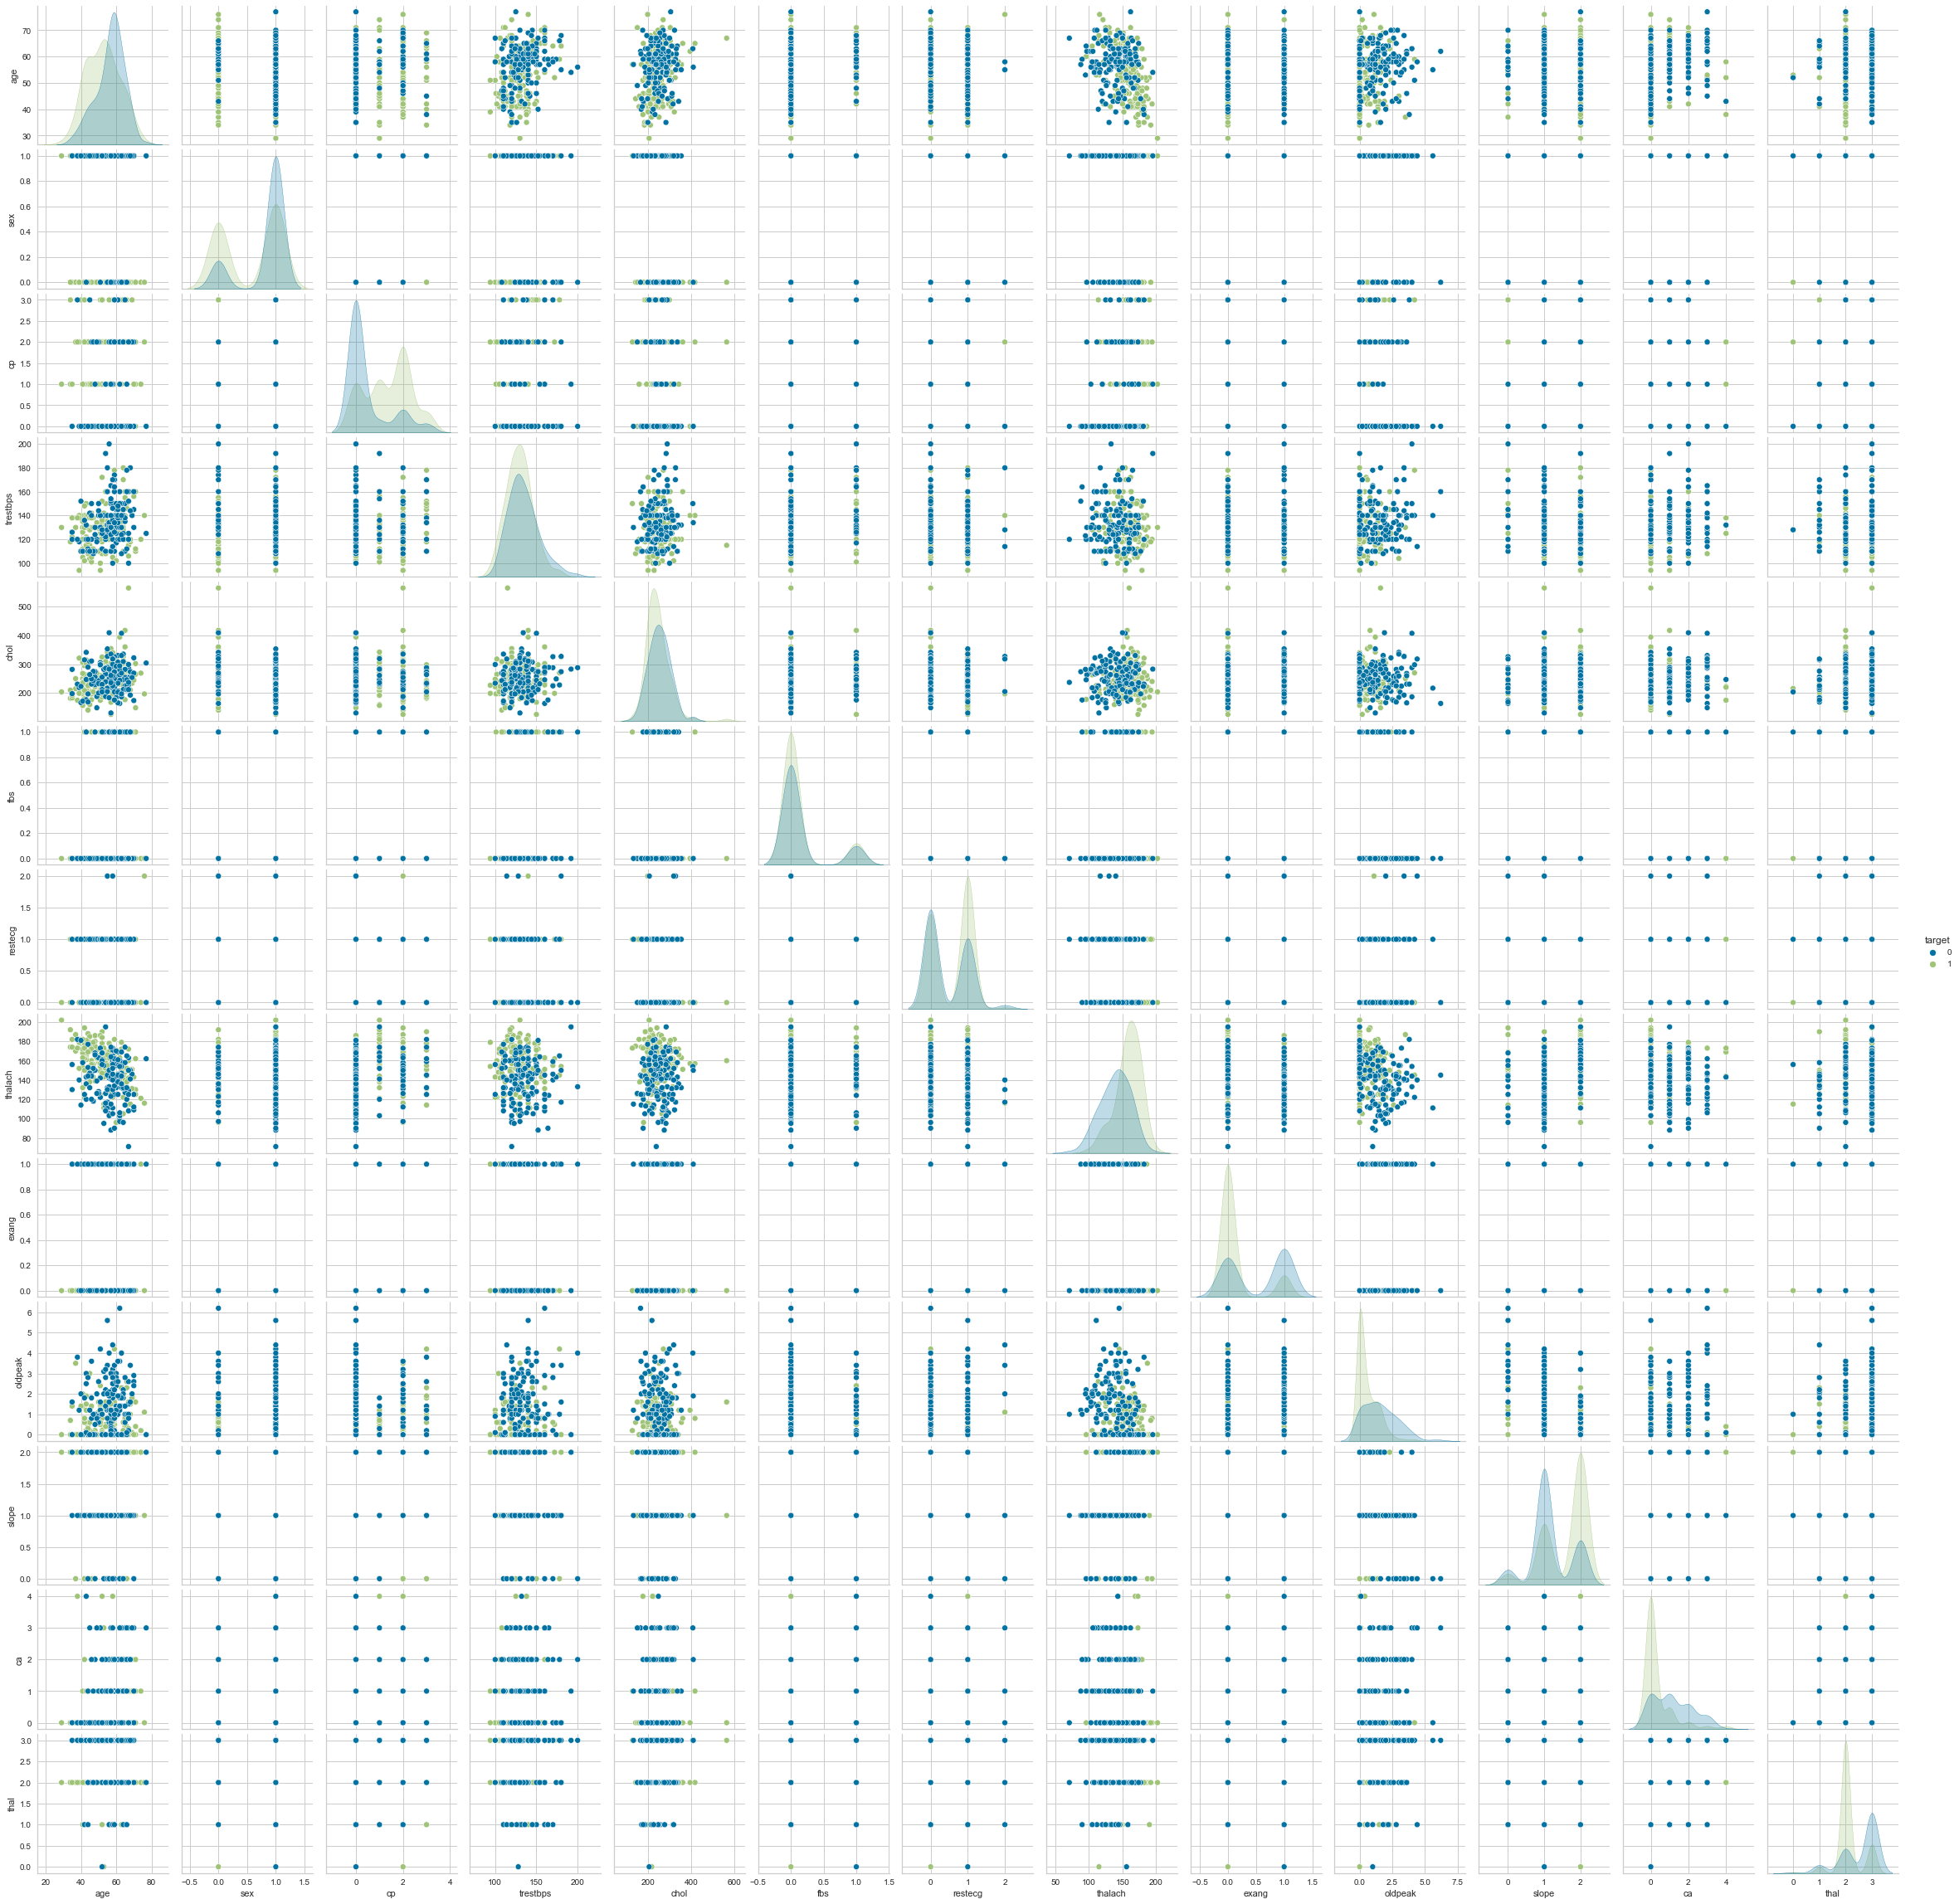

In [ ]:
sns.pairplot(df, hue='target');

## Target Variable

In [ ]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

In [ ]:
df['target'].iplot(kind='hist')

# Data Preprocessing

## Model-Library


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

### Train | Test Split and Scaling

In [ ]:
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [ ]:
log_model = LogisticRegression(class_weight='balanced')


In [ ]:
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [ ]:
pd.DataFrame(y_pred_proba)
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
test_data = pd.DataFrame.from_dict(my_dict).sample(10)
test_data

,Actual,Pred,Proba_1,Proba_0
13,1,1,0.704964,0.295036
202,0,0,0.070391,0.929609
154,1,1,0.975032,0.024968
280,0,0,0.276031,0.723969
171,0,0,0.458787,0.541213
12,1,1,0.845140,0.154860
243,0,0,0.021496,0.978504
134,1,1,0.961040,0.038960
90,1,1,0.852678,0.147322
238,0,0,0.062290,0.937710


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.81      0.97      0.88        31

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



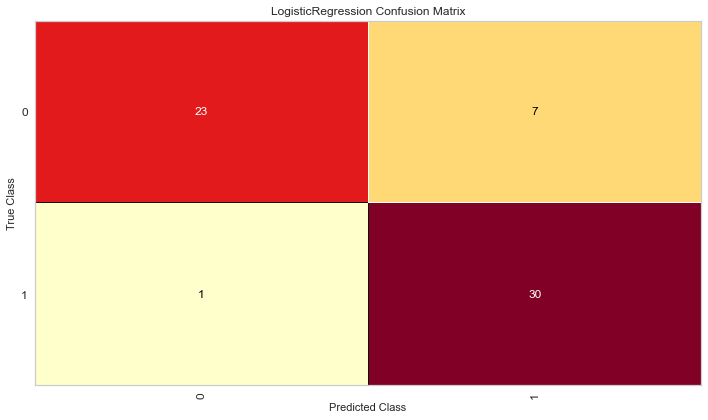

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(log_model)
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_scaled, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_scaled, y_test)
cm.show();

## Cross Validate

In [ ]:
model = LogisticRegression(class_weight='balanced')

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.011987,0.011997,0.840000,0.840000,0.840000,0.840000
2,0.013982,0.006002,0.750000,0.750000,0.750000,0.750000
3,0.011511,0.004996,0.833333,0.838542,0.833333,0.829630
4,0.006995,0.004994,0.791667,0.792262,0.791667,0.790564
5,0.006018,0.007972,0.750000,0.750000,0.750000,0.750000
6,0.013987,0.006991,0.791667,0.795139,0.791667,0.792029
7,0.006994,0.004996,0.791667,0.792262,0.791667,0.790564
8,0.010993,0.005991,0.750000,0.760490,0.750000,0.750000
9,0.005992,0.006996,0.875000,0.876786,0.875000,0.874339
10,0.006994,0.004993,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_scores.mean()[2:]

test_accuracy              0.817333
test_precision_weighted    0.819548
test_recall_weighted       0.817333
test_f1_weighted           0.816713
dtype: float64

In [ ]:
Log_reg_recal = df_scores["test_recall_weighted"].mean()
Log_reg_recal

0.8173333333333332

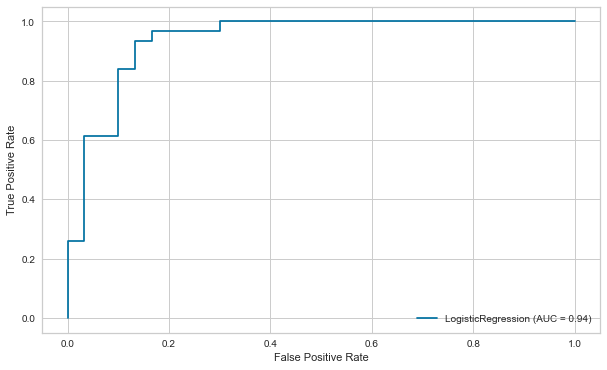

In [ ]:
plot_roc_curve(log_model, X_test_scaled, y_test, response_method='auto');

In [ ]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.654620588276227

In [ ]:
test_data["pred2"] = test_data["Proba_1"].apply(lambda x : 1 if x >= optimal_threshold else 0)
test_data

,Actual,Pred,Proba_1,Proba_0,pred2
13,1,1,0.704964,0.295036,1
202,0,0,0.070391,0.929609,0
154,1,1,0.975032,0.024968,1
280,0,0,0.276031,0.723969,0
171,0,0,0.458787,0.541213,0
12,1,1,0.845140,0.154860,1
243,0,0,0.021496,0.978504,0
134,1,1,0.961040,0.038960,1
90,1,1,0.852678,0.147322,1
238,0,0,0.062290,0.937710,0


In [ ]:
test_data.Pred.value_counts()

1    5
0    5
Name: Pred, dtype: int64

In [ ]:
test_data.pred2.value_counts(normalize=True)

1    0.5
0    0.5
Name: pred2, dtype: float64

optimal_treshold ile 1 bilme oranımız azaldı.


# Implement KNN and Evaluate

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled,y_train)
y_pred = knn_model.predict(X_test_scaled)
y_pred_proba = knn_model.predict_proba(X_test_scaled)

my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
48,1,1,1.0,0.0
91,1,0,0.4,0.6
179,0,0,0.0,1.0
216,0,1,0.6,0.4
134,1,1,1.0,0.0
159,1,0,0.2,0.8
275,0,0,0.4,0.6
282,0,1,1.0,0.0
205,0,0,0.4,0.6
90,1,1,1.0,0.0


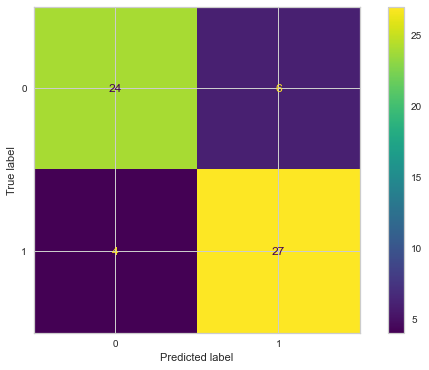

In [ ]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[24  6]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.82      0.87      0.84        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



## Elbow Method for Choosing Reasonable K Values

In [ ]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)  ## recall aldığımızda k değeri farklı geliyor. 
    test_error_rates.append(test_error)

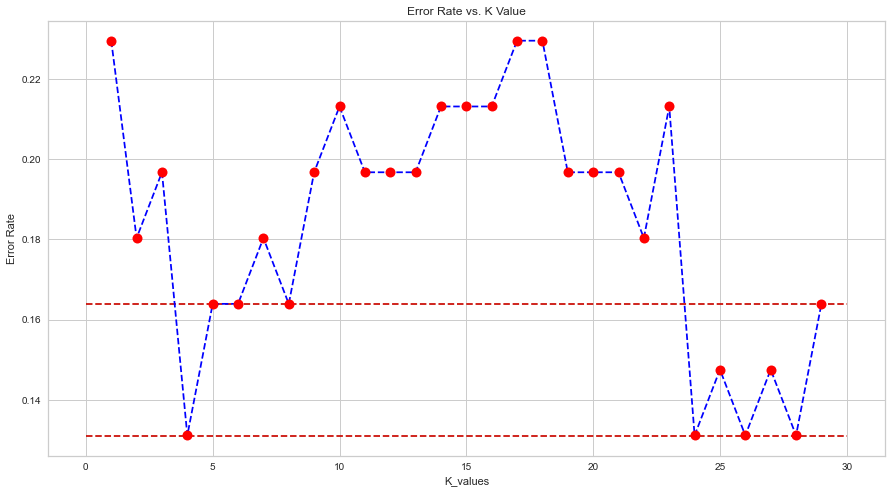

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.164, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.131, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=4')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=4


[[27  3]
 [ 5 26]]


              precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.90      0.84      0.87        31

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
knn_grid = KNeighborsClassifier()

k_values= range(1,30)
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
knn_grid_model.best_params_

{'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12, p=1)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=12')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=12


[[23  7]
 [ 5 26]]


              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.79      0.84      0.81        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
knn = KNeighborsClassifier(n_neighbors=4, p=1)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=4')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=4


[[25  5]
 [ 5 26]]


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.84      0.84      0.84        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# Implement SVM and Evaluate

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
svm_model_scaled = SVC()
svm_model_scaled.fit(X_train_scaled, y_train)
y_pred = svm_model_scaled.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22  8]
 [ 3 28]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        30
           1       0.78      0.90      0.84        31

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [ ]:
from sklearn.model_selection import cross_validate

model = SVC()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.817833
test_precision    0.815995
test_recall       0.880769
test_f1           0.843070
dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}

In [ ]:
model = SVC()
svm_model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)

In [ ]:
svm_model_grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.735, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.812, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.771, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.771, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.938, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.816, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.750, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.854, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.816, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.833, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.729, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.771, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.958, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.958, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.755, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.792, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.771, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.792, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.833, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.776, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .

[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.750, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.792, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.958, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.816, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.812, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.792, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.771, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.796, total=   0.2s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.833, total=   0.2s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.750, total=   0.2s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.792, total=   0.1s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.958, total=   0.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.735, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.812, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ...... C=1000, gamma=1, kernel=linear, score=0.796, total=   1.3s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.833, total=   1.7s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.750, total=   2.2s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.792, total=   1.4s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.958, total=   1.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.708, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   54.2s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [ ]:
svm_model_grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
Svc_best_model = SVC(kernel='rbf', C=1000, gamma=0.001)


In [ ]:
svm_model_grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [ ]:
y_pred_grid = svm_model_grid.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))

[[22  8]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83        30
           1       0.79      0.97      0.87        31

    accuracy                           0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61



# Visually compare models based on your chosen metric

In [ ]:
Log_reg_recal

0.8173333333333332

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12, p=1)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.79      0.84      0.81        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
Knn_reg_cal = 0.84
Knn_reg_cal

0.84

In [ ]:
y_pred_grid = svm_model_grid.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))

[[22  8]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83        30
           1       0.79      0.97      0.87        31

    accuracy                           0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61



In [ ]:
Svc_reg_recal = 0.97

In [ ]:
skore_dict = { "Log_reg_recal":[Log_reg_recal],"Knn_reg_cal":[Knn_reg_cal],"Svc_reg_recal":[Svc_reg_recal]}
skore = pd.DataFrame.from_dict(skore_dict)
skore

,Log_reg_recal,Knn_reg_cal,Svc_reg_recal
0,0.817333,0.84,0.97


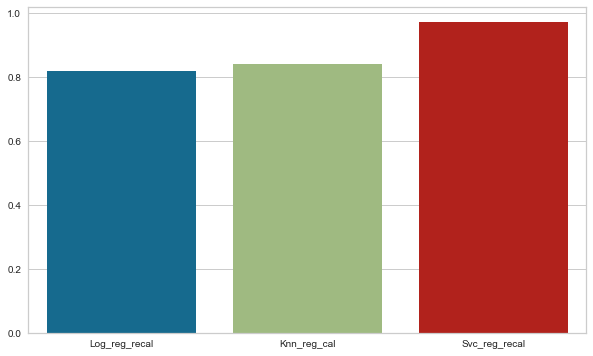

In [ ]:
sns.barplot(skore.iloc[0].index,skore.iloc[0].values);


# Chose best model and make a random prediction 

In [ ]:
Svc_reg_recal = 0.88

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
new_obs = {'age':[43], 'sex':[1], 'cp':[2], 'trestbps':[115], 'chol':[150], 'fbs':[0], 'restecg':[1], 'thalach':[160],
       'exang':[1], 'oldpeak':[1.8], 'slope':[2], 'ca':[2], 'thal':[2]
          }



In [ ]:
samples = pd.DataFrame(new_obs)
samples

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,43,1,2,115,150,0,1,160,1,1.8,2,2,2


In [ ]:
samples_scaled = scaler.transform(samples)
samples_scaled


array([[-1.26598238,  0.6983225 ,  1.01976344, -0.91536181, -1.84810431,
        -0.44609974,  0.86058394,  0.4616542 ,  1.43200311,  0.61951402,
         0.96742358,  1.26696815, -0.56413618]])

In [ ]:

new_prediction = svm_model_grid.predict(samples_scaled)
new_prediction

array([1], dtype=int64)